# Project: Predicting Housing Prices in King County

We will use the **King County House Sales dataset**:  
[House Sales Prediction (Kaggle)](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

# Modeling & Model Analysis
- **Process**
    - I set up a few notebook blocks to quickly adjust my main pre-processing variables: column selection and sigma filtering.
    - I used a single block that performed the train/test split, z-scaling, and linear/lasso/ridge regressions, including alpha penalty variations. The block runs 15 models, with the results saved into a dataframe.
    - Overall, this setup allowed me to quickly test changes and review the results in dataframe without the need to run a grid search or more sophisticated control code.
    - The next block of code extracts the entry with the smallest MAE from the results database
    - The final block on this page generates 2-D plots for fit and residual on each parameter vs. price. The plot color legend shows grade.
- **Findings**
    - I chose a test size of 10% and I don't see any obvious signs of overfitting in the metrics. R-squared was was 0.62 and 0.63 on the train and test datasets, respectively, when using largely unmodified columns and data.
    - I evaluated lasso and ridge regression but did not gain much benefit from regularization. R-squared , MAE, and RMSE values were generally consistent across all three models when using reasonable alpha values. Lasso and Ridge regressions start to break down with alpha > 10,000.
    - The lasso model eliminated waterfront, sqft_basement, and sqft_lot from the original columns.
    - sqft_living, grade, age (built or renovated), view, bed, and bath were consistently good performers.

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
# Uncomment to initialize results table. Comment out to protect work history.

results_list = []

### Model testing

In [28]:
# Apply sigma filtering
sd_filter = 10
df_filtered = df.copy()
for param in plot_list:
    sd_filter_thresh = stats_df.loc[1, param] + sd_filter * stats_df.loc[2, param]
    df_filtered = df_filtered.drop(df_filtered[df_filtered[param] > sd_filter_thresh].index)

In [29]:
# Use all columns
col_list = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode',
            'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'age_built_or_reno']

x_input = df_filtered[col_list]
y_input = df_filtered['price']
len(col_list)

19

In [30]:
# Remove spatial columns
col_list = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
            #'zipcode',
            #'lat', 'long',
            'sqft_living15', 'sqft_lot15', 'year', 'month', 'age_built_or_reno']

x_input = df_filtered[col_list]
y_input = df_filtered['price']
len(col_list)

16

In [31]:
# User selected columns  -- Default if all three code blocks are run.
col_list = ['sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade',
            'sqft_above', 'sqft_basement', 'sqft_living15','sqft_lot15', 'age_built_or_reno',
            'bedrooms_win', 'bathrooms_win', 'multi_story']

x_input = df_filtered[col_list]
y_input = df_filtered['price']
len(col_list)

14

In [32]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x_input,
                                                    y_input,
                                                    test_size=0.10,
                                                    random_state=42)
# Z-scaling
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

results_list.append(['linear',
                     '',
                     x_train.columns,
                     len(x_train.columns),
                     sd_filter,
                     df_filtered.shape[0],
                     round(r2_score(y_train, y_pred_train),2),
                     round(r2_score(y_test, y_pred_test),2),
                     round(mean_absolute_error(y_train, y_pred_train),2),
                     round(mean_absolute_error(y_test, y_pred_test),2),
                     round(root_mean_squared_error(y_train, y_pred_train),2),
                     round(root_mean_squared_error(y_test, y_pred_test),2),
                     y_test.median(),
                     np.sum(lr.coef_ != 0),
                     lr.coef_,
                     lr.intercept_
                    ])

# Lasso Regression
for i in [0.5,1,10,100,1000,10000]:
    lr = Lasso(alpha=i)
    lr.fit(x_train, y_train)
    y_pred_train = lr.predict(x_train)
    y_pred_test = lr.predict(x_test)
    
    results_list.append(['lasso',
                         i,
                         x_train.columns,
                         len(x_train.columns),
                         sd_filter,
                         df_filtered.shape[0],
                         round(r2_score(y_train, y_pred_train),2),
                         round(r2_score(y_test, y_pred_test),2),
                         round(mean_absolute_error(y_train, y_pred_train),2),
                         round(mean_absolute_error(y_test, y_pred_test),2),
                         round(root_mean_squared_error(y_train, y_pred_train),2),
                         round(root_mean_squared_error(y_test, y_pred_test),2),
                         y_test.median(),
                         np.sum(lr.coef_ != 0),
                         lr.coef_,
                         lr.intercept_
                        ])

# Ridge Regression
for i in [0.5,1,10,100,1000,10000]:
    lr = Ridge(alpha=i)
    lr.fit(x_train, y_train)
    y_pred_train = lr.predict(x_train)
    y_pred_test = lr.predict(x_test)
    
    results_list.append(['ridge',
                         i,
                         x_train.columns,
                         len(x_train.columns),
                         sd_filter,
                         df_filtered.shape[0],
                         round(r2_score(y_train, y_pred_train),2),
                         round(r2_score(y_test, y_pred_test),2),
                         round(mean_absolute_error(y_train, y_pred_train),2),
                         round(mean_absolute_error(y_test, y_pred_test),2),
                         round(root_mean_squared_error(y_train, y_pred_train),2),
                         round(root_mean_squared_error(y_test, y_pred_test),2),
                         y_test.median(),
                         np.sum(lr.coef_ != 0),
                         lr.coef_,
                         lr.intercept_
                        ])

# Print results as DataFrame
result_df = pd.DataFrame(results_list, columns=['model', 'alpha', 'columns', 'num_columns', 'Sigma Filter', 'num_rows',
                                                'r2_train', 'r2_test', 'mae_train', 'mae_test', 'rmse_train', 'rmse_test',
                                                'median price', 'n_features', 'coefficients', 'intercept'])

result_df.tail(15)

/Volumes/Dionysus/opt/anaconda3/envs/anaconda-2025.06-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.001e+13, tolerance: 2.099e+11
  model = cd_fast.enet_coordinate_descent(
/Volumes/Dionysus/opt/anaconda3/envs/anaconda-2025.06-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.002e+13, tolerance: 2.099e+11
  model = cd_fast.enet_coordinate_descent(
/Volumes/Dionysus/opt/anaconda3/envs/anaconda-2025.06-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want 

,model,alpha,columns,num_columns,Sigma Filter,num_rows,r2_train,r2_test,mae_train,mae_test,rmse_train,rmse_test,median price,n_features,coefficients,intercept
0,linear,,"Index(['sqft_living', 'sqft_lot', 'waterfront'...",14,10,21212,0.62,0.62,136952.98,131328.78,203395.29,194863.95,450000.0,14,"[65858.8276253656, -4048.4966194476, 3.6379788...",532108.016867
1,lasso,0.5,"Index(['sqft_living', 'sqft_lot', 'waterfront'...",14,10,21212,0.62,0.62,136953.02,131328.87,203395.29,194864.03,450000.0,13,"[237407.2574525652, -4047.895074214785, 0.0, 3...",532108.016867
2,lasso,1,"Index(['sqft_living', 'sqft_lot', 'waterfront'...",14,10,21212,0.62,0.62,136953.06,131328.95,203395.29,194864.10,450000.0,13,"[236251.327996177, -4047.293528982069, 0.0, 35...",532108.016867
3,lasso,10,"Index(['sqft_living', 'sqft_lot', 'waterfront'...",14,10,21212,0.62,0.62,136953.80,131330.48,203395.30,194865.50,450000.0,13,"[215444.5977812265, -4036.465714792925, 0.0, 3...",532108.016867
4,lasso,100,"Index(['sqft_living', 'sqft_lot', 'waterfront'...",14,10,21212,0.62,0.62,136928.65,131316.74,203395.61,194857.11,450000.0,11,"[126203.62498467985, -3973.329359016521, 0.0, ...",532108.016867
5,lasso,1000,"Index(['sqft_living', 'sqft_lot', 'waterfront'...",14,10,21212,0.62,0.63,136697.41,131163.72,203424.66,194823.27,450000.0,11,"[124907.26013389106, -3241.61803505895, 0.0, 3...",532108.016867
6,lasso,10000,"Index(['sqft_living', 'sqft_lot', 'waterfront'...",14,10,21212,0.61,0.62,136873.55,132263.19,206257.00,197086.01,450000.0,9,"[112416.76735041015, -0.0, 0.0, 33496.03236444...",532108.016867
7,ridge,0.5,"Index(['sqft_living', 'sqft_lot', 'waterfront'...",14,10,21212,0.62,0.62,136952.49,131328.41,203395.29,194863.77,450000.0,13,"[65858.11916793553, -4048.262909065166, 0.0, 3...",532108.016867
8,ridge,1,"Index(['sqft_living', 'sqft_lot', 'waterfront'...",14,10,21212,0.62,0.62,136952.01,131328.03,203395.29,194863.60,450000.0,13,"[65857.41065065014, -4048.0292807307387, 0.0, ...",532108.016867
9,ridge,10,"Index(['sqft_living', 'sqft_lot', 'waterfront'...",14,10,21212,0.62,0.62,136943.28,131321.26,203395.34,194860.47,450000.0,13,"[65844.64743537565, -4043.837936367725, 0.0, 3...",532108.016867


### Best Model

In [33]:
#Show best model from results
best_run = result_df[result_df['mae_test'] == result_df['mae_test'].min()].reset_index()

display(best_run)

#Get best fit params
br_cols = best_run.loc[0, 'columns']
br_coeff = best_run.loc[0, 'coefficients']
br_intercept = best_run.loc[0, 'intercept']

#Show coefficients from best fit
coeff_df = pd.DataFrame(list(zip(br_cols, br_coeff)), columns = ['columns', 'coefficients'])
coeff_df['abs_coeff'] = abs(coeff_df['coefficients'])
coeff_df = coeff_df.sort_values('abs_coeff', ascending=False).reset_index()

display(coeff_df[['columns', 'coefficients']])

,index,model,alpha,columns,num_columns,Sigma Filter,num_rows,r2_train,r2_test,mae_train,mae_test,rmse_train,rmse_test,median price,n_features,coefficients,intercept
0,11,ridge,1000,"Index(['sqft_living', 'sqft_lot', 'waterfront'...",14,10,21212,0.62,0.62,136411.76,131003.71,203754.85,194944.16,450000.0,13,"[64374.89058437479, -3690.1929249457694, 0.0, ...",532108.016867


,columns,coefficients
0,grade,125145.632011
1,age_built_or_reno,76216.139890
2,sqft_living,64374.890584
3,sqft_above,53579.529276
4,bathrooms_win,38882.852308
5,view,36147.817565
6,sqft_basement,32036.220608
7,bedrooms_win,-28064.810436
8,sqft_living15,23981.067919
9,condition,13800.604863


### Best Model Plots

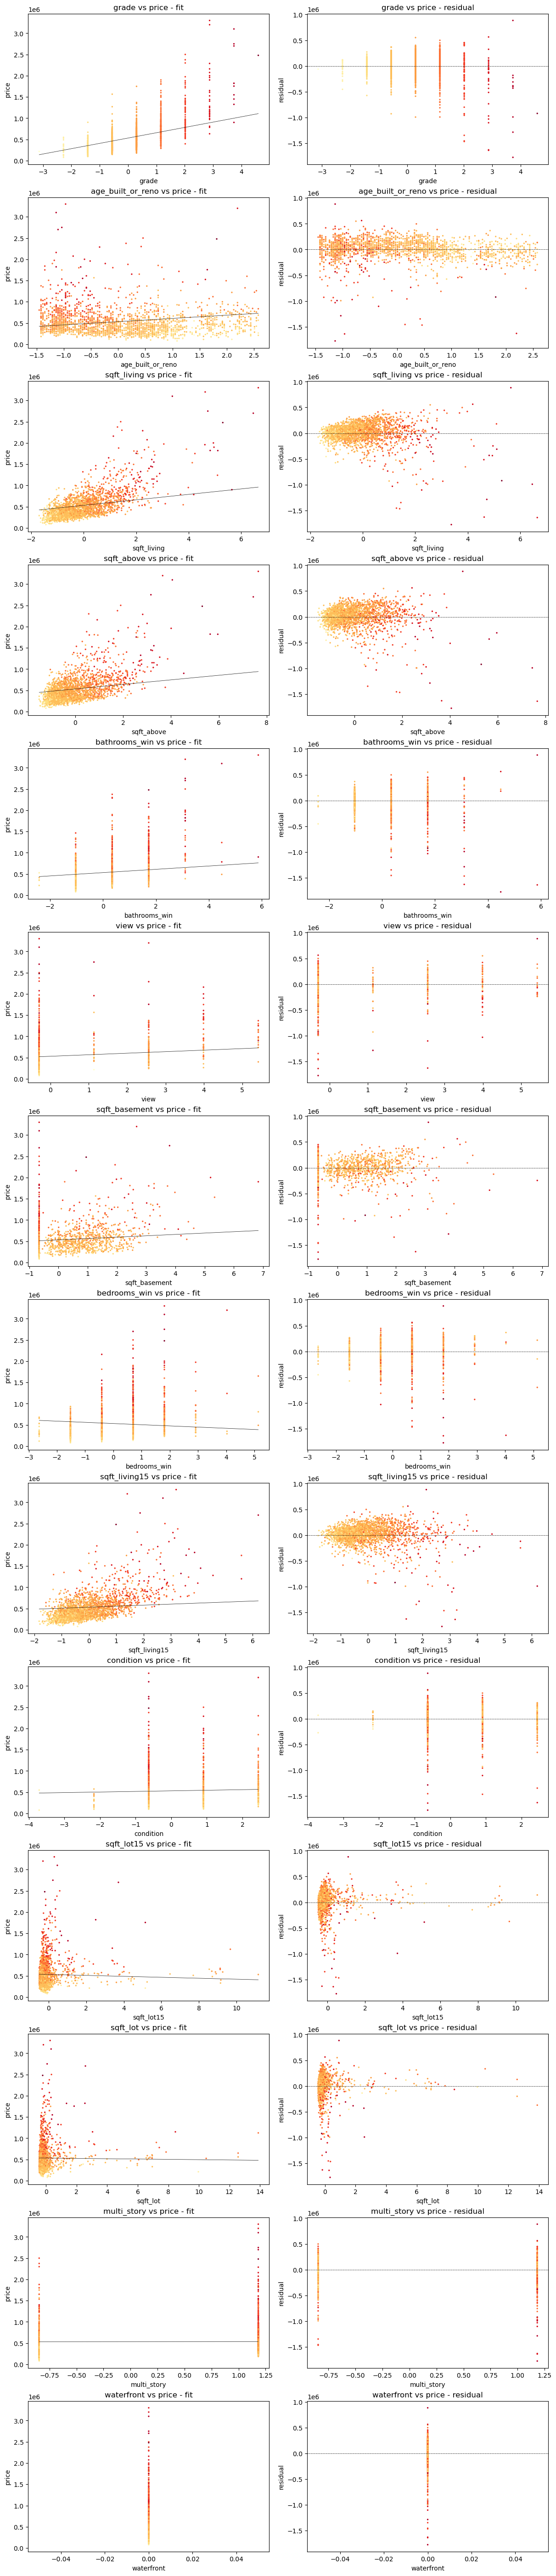

In [34]:
# Plot all features from coefficient table

length = coeff_df.shape[0]

plt.figure(figsize=(12,4*length), layout='constrained')

for i in range(length):
    param_name = coeff_df.loc[i, 'columns']
    param_coeff = coeff_df.loc[i, 'coefficients']
    
    # Plot test-dataset feature vs. price
    plt.subplot(length, 2, i*2+1)
    plt.scatter(x_test[param_name], y_test, s=2, c=x_test['grade'], cmap='YlOrRd')
    plt.xlabel(param_name)
    plt.ylabel('price')
    plt.title(f'{param_name} vs price - fit')
    
    # Plot line of fit
    x_fit = np.array([x_test[param_name].min(),
                      x_test[param_name].max()])
    y_fit = np.array([br_intercept + param_coeff * x_test[param_name].min(),
                     br_intercept + param_coeff * x_test[param_name].max()])
    plt.plot(x_fit, y_fit, color='black', label='Predicted', linewidth=0.5)

    # Plot test-dataset residual vs. price
    y_residuals = y_pred_test - y_test
    
    plt.subplot(length, 2, i*2+2)
    plt.scatter(x_test[param_name], y_residuals, s=2, c=x_test['grade'], cmap='YlOrRd')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.xlabel(param_name)
    plt.ylabel('residual')
    plt.title(f'{param_name} vs price - residual')

plt.show()

In [35]:
#Lasso, alpha=1000 model results

#Show best model from results
best_run = result_df.loc[((result_df['model']=='lasso') & (result_df['alpha']==1000))].reset_index()

display(best_run)

#Get best fit params
br_cols = best_run.loc[0, 'columns']
br_coeff = best_run.loc[0, 'coefficients']
br_intercept = best_run.loc[0, 'intercept']

#Show coefficients from best fit
coeff_df = pd.DataFrame(list(zip(br_cols, br_coeff)), columns = ['columns', 'coefficients'])
coeff_df['abs_coeff'] = abs(coeff_df['coefficients'])
coeff_df = coeff_df.sort_values('abs_coeff', ascending=False).reset_index()

display(coeff_df[['columns', 'coefficients']])

,index,model,alpha,columns,num_columns,Sigma Filter,num_rows,r2_train,r2_test,mae_train,mae_test,rmse_train,rmse_test,median price,n_features,coefficients,intercept
0,5,lasso,1000,"Index(['sqft_living', 'sqft_lot', 'waterfront'...",14,10,21212,0.62,0.63,136697.41,131163.72,203424.66,194823.27,450000.0,11,"[124907.26013389106, -3241.61803505895, 0.0, 3...",532108.016867


,columns,coefficients
0,grade,139501.680432
1,sqft_living,124907.260134
2,age_built_or_reno,84031.885614
3,bathrooms_win,39150.515060
4,view,35474.020555
5,bedrooms_win,-29991.081089
6,sqft_living15,16267.893074
7,condition,11891.631495
8,sqft_lot15,-10939.305479
9,sqft_lot,-3241.618035
